# Problem Statement

Develop a machine learning model to predict heart disease risk and provide actionable insights for preventive care in a hospital setting.

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
# Load the CSV files
labels_path = "labels.csv"
values_path = "values.csv"

labels_df = pd.read_csv(labels_path)
values_df = pd.read_csv(values_path)

##### Basic Checks

* labels.csv

In [3]:
# Display the first few rows of each dataframe
labels_df.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


labels_df indicates with the patient_id that whether patient has heart decease or not

In [4]:
labels_df.tail()

,patient_id,heart_disease_present
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0
179,2nx10r,0


In [5]:
labels_df.shape

(180, 2)

In [6]:
labels_df.dtypes

patient_id               object
heart_disease_present     int64
dtype: object

* values.csv

In [7]:
# Display the first few rows of each dataframe
values_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [8]:
values_df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [9]:
values_df.shape

(180, 14)

In [10]:
values_df.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

### DOMAIN ANALYSIS

Main features identified-
* slope_of_peak_exercise_st_segment

In a heart disease dataset, slope_of_peak_exercise_st_segment typically refers to the slope of the ST segment in the ECG (electrocardiogram) during peak exercise.
This measurement is used to assess the shape and behavior of the ST segment, which is part of the ECG trace. 


ST Segment : The ST segment is the flat section of the ECG trace between the end of the S wave and the start of the T wave.
            It represents the period when the heart's ventricles are depolarized and should be relatively stable.

Peak Exercise: This refers to the state during or after a physical stress test (such as a treadmill test) 
               when the heart is working at its maximum capacity.

Slope of the ST Segment: The slope measures the rate of change of the ST segment during peak exercise. 
                          It helps in identifying potential abnormalities in the heart's response to exercise. 
For example:
    Upsloping  : A slope that rises gradually can indicate a normal response or slight abnormality.
    Downsloping: A downward slope can be indicative of issues such as ischemia (reduced blood flow to the heart).
    Horizontal : A flat ST segment can also be a sign of abnormalities.
In the context of heart disease,
   this feature helps in diagnosing conditions related to ischemia or other cardiac issues that manifest under stress.

* thal

typically refers to a variable related to the presence of thalassemia, a blood disorder that affects the production of hemoglobin. 
However, in the context of heart disease datasets, thal  refers to the thallium stress test or thallium scan,
which is used to assess blood flow to the heart muscle.

Here’s what thal usually represents in such datasets:
Thalassemia (as a diagnosis): A genetic disorder that affects the production of hemoglobin in red blood cells.
                             In medical datasets, it might be used as a categorical variable indicating the presence or
                             absence of thalassemia, which can impact the interpretation of other cardiac tests.

Thallium Stress Test: A type of nuclear imaging test where thallium, a radioactive tracer, 
                      is injected into the bloodstream during a stress test to visualize blood flow to the heart.
                      It helps in identifying areas of the heart that might not be receiving enough blood.

Values: In some datasets, thal might have values like:
                    3: Normal
                    6: Fixed defect (scar tissue from previous heart attacks)
                    7: Reversible defect (reduced blood flow that could be due to a temporary blockage)
Understanding thal in the dataset can help in diagnosing and evaluating the severity of heart conditions.

*resting_blood_pressure 

refers to the measurement of a patient's blood pressure while they are at rest, 
usually taken during a medical examination or screening. 
Blood pressure is a critical indicator of cardiovascular health. 

Here’s what it signifies:
Blood Pressure: Blood pressure is recorded as two numbers:
       Systolic Pressure    :  The pressure in the arteries when the heart beats (the higher number).
       Diastolic Pressure    : The pressure in the arteries when the heart rests between beats (the lower number).
       Resting Blood Pressure: This measurement is taken when the patient is at rest and is not under any physical or
                               emotional stress. 
                               It provides a baseline reading that helps assess overall cardiovascular health.

Importance in Heart Disease:
        High Blood Pressure (Hypertension):Elevated resting blood pressure can be a risk factor for heart disease 
                                           and other cardiovascular conditions. It can indicate increased strain
                                           on the heart and arteries.
          Low Blood Pressure (Hypotension): While less common, low blood pressure can also be a concern 
                                            if it leads to symptoms like dizziness or fainting.
resting_blood_pressure 
         is used to help evaluate a patient’s risk of heart disease and
         monitor their cardiovascular health. It is often measured in millimeters of mercury (mmHg).

* chest_pain_type

refers to the classification of the type of chest pain a patient experiences.
Chest pain is a common symptom of heart disease and can vary in its nature, duration, and intensity.
Understanding the type of chest pain helps in diagnosing and assessing the severity of cardiovascular conditions.

Here’s what chest_pain_type might indicate:

Types of Chest Pain: This variable is often categorized into several types, such as:

Typical Angina: Pain or discomfort that occurs with exertion and is relieved by rest or medication. 

It is usually a sign of coronary artery disease (CAD).

Atypical Angina: Pain or discomfort that is less typical but still associated with CAD. 

It might not follow the classic pattern of angina.

Non-Anginal Pain: Pain that is not related to angina or CAD. 

It could be due to other causes, such as gastrointestinal or musculoskeletal issues.

Asymptomatic: No chest pain or discomfort reported.
        
Significance in Heart Disease: Different types of chest pain can help differentiate between various heart conditions.

For example:
Typical Angina: Often indicates a higher likelihood of coronary artery disease.

Non-Anginal Pain: May suggest that the pain is due to other non-cardiac issues.

In a dataset, chest_pain_type is typically represented as a categorical variable with numerical codes or descriptive labels,
helping clinicians and researchers understand the relationship between chest pain characteristics
and heart disease outcomes.

* num_major_vessels

typically refers to the number of major blood vessels (0 to 3) that are visible on a fluoroscopy (an X-ray technique)
that have been highlighted with a dye. 
This feature is used to help assess the presence and severity of coronary artery disease (CAD).

In general:
0 vessels: No major vessels are visible, which might indicate no significant coronary artery disease.
1-3 vessels: The number of visible vessels can help indicate the extent of blockage or narrowing,
             which can be associated with more severe coronary artery disease.
Higher values generally suggest more significant blockages or more severe disease, 
while a lower value suggests less disease.

* fasting_blood_sugar_gt_120_mg_per_dl

typically indicates whether the fasting blood sugar level is greater than 120 mg/dL.

This is a binary feature, where:
1 (or True) means that the fasting blood sugar level is greater than 120 mg/dL.
0 (or False) means that the fasting blood sugar level is 120 mg/dL or less.
Elevated fasting blood sugar levels can be a risk factor for diabetes, which in turn is associated with 
   an increased risk of heart disease. 
  This feature helps to assess the presence of diabetes or impaired glucose tolerance,
  which are important factors in evaluating heart disease risk.

* resting_ekg_results 

typically represents the results of a resting electrocardiogram (ECG or EKG) test.
The resting EKG measures the electrical activity of the heart while the patient is at rest. 

The feature often includes several possible values that correspond to different types of findings:

0: Normal results. The EKG does not show any abnormalities.
1: Having ST-T wave abnormalities, which can indicate issues like ischemia or myocardial infarction.
2: Showing possible left ventricular hypertrophy (LVH) which might suggest an enlarged heart or other structural issues.
3: Other abnormal findings or specific abnormalities not covered by the standard categories.
These results help in diagnosing various heart conditions and assessing the overall health of the heart.

* serum_cholesterol_mg_per_dl 

refers to the level of cholesterol in the blood, measured in milligrams per deciliter (mg/dL). 
Cholesterol is a fatty substance that can build up in the arteries and lead to cardiovascular diseases.

Higher levels of serum cholesterol, especially low-density lipoprotein (LDL) cholesterol, 
are associated with an increased risk of heart disease because they can contribute to plaque buildup in the arteries.
Conversely, higher levels of high-density lipoprotein (HDL) cholesterol are generally considered protective against
heart disease.

The serum_cholesterol_mg_per_dl feature helps to assess the risk of heart disease by providing information on
cholesterol levels, which is an important factor in evaluating cardiovascular health.


* oldpeak_eq_st_depression 

refers to the value of ST depression induced by exercise relative to rest, measured in millimeters.
This value is obtained from an exercise electrocardiogram (ECG or EKG) test,
where the patient performs physical exercise, typically on a treadmill, 
while their heart's electrical activity is monitored.

Oldpeak: Indicates the amount of ST segment depression, which can be a sign of ischemia 
    (reduced blood flow to the heart muscle).
ST segment: The flat section of the ECG between the end of the S wave and the start of the T wave. 
    Depression in this segment during exercise can be indicative of potential coronary artery disease.

    In summary:
Higher values of oldpeak suggest greater ST depression and potential for ischemia or heart disease.
Lower or zero values generally suggest that the heart is responding normally to exercise.
This feature is used to help assess the presence and severity of heart conditions based on exercise-induced 
changes in the heart's electrical activity.

* max_heart_rate_achieved 

refers to the highest heart rate reached during an exercise stress test, 
typically performed on a treadmill or stationary bike. 
This test evaluates how well the heart performs under physical exertion.

Max Heart Rate Achieved: This value is measured in beats per minute (bpm) and
    indicates the peak heart rate reached during the exercise.

    A few key points about this feature:

Higher Values: Generally indicate good cardiovascular fitness and the ability to handle increased physical stress.
Lower Values: May suggest potential cardiovascular issues or reduced physical fitness.
Abnormalities in the maximum heart rate achieved, when compared to expected norms based on age and fitness level, 
can help in diagnosing various heart conditions, such as coronary artery disease or other forms of heart dysfunction.

* exercise_induced_angina 

 indicating whether angina (chest pain or discomfort) was induced by exercise.

    It is typically represented as a binary variable:

 1 (or True): Angina was induced during or after exercise.
 0 (or False): No angina was induced during or after exercise.
Exercise-induced angina can be a significant indicator of coronary artery disease (CAD). 
If angina occurs during exercise, it may suggest that the heart is not receiving enough oxygen 
due to narrowed or blocked coronary arteries, 
which can be a sign of more severe cardiovascular issues.
This feature is useful for assessing the likelihood of CAD and overall cardiovascular health.

* Sex 

sex is a feature indicating the gender of the patient.
It is typically represented as a binary variable:

0: Female
1: Male
Gender can be an important factor in assessing heart disease risk,
as certain cardiovascular conditions and risk factors can differ between males and females.
For example, heart disease often presents differently in women compared to men, and risk factors like high blood pressure,
cholesterol levels, and diabetes might have varying impacts based on gender. 
Including sex in the dataset helps in analyzing and predicting heart disease while 
considering gender-specific risk factors and patterns.

* age 

represents the age of the patient, 
typically measured in years. Age is a significant factor in evaluating heart disease risk because:

Risk Increases with Age: 
    The risk of developing heart disease generally increases as people get older. 
    This is due to the cumulative effect of risk factors such as high blood pressure, high cholesterol, 
    and lifestyle factors over time.

Age-related Changes: 
    As people age, the heart and blood vessels undergo changes that can increase the risk of cardiovascular issues,
    such as decreased elasticity of blood vessels and an increased likelihood of plaque buildup in the arteries.

Incorporating age into the analysis helps in understanding how age impacts heart disease risk 
  and in developing age-specific risk assessments and treatment strategies.

** Merge the two datasets on patient_id

In [11]:
merged_df = pd.merge(values_df, labels_df, on='patient_id')

# Display the first few rows of the merged dataframe
merged_df.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [12]:
merged_df.shape

(180, 15)

In [13]:
merged_df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [14]:
merged_df.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [16]:
merged_df.describe

<bound method NDFrame.describe of     patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128       

In [17]:
merged_df.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='heart_disease_present', ylabel='count'>

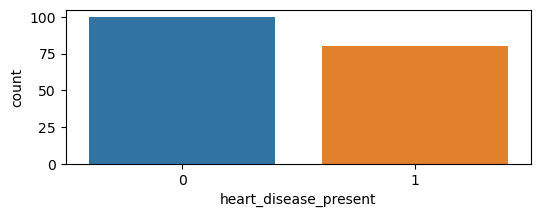

In [18]:
plt.figure(figsize=(6,2))
sns.countplot(x=merged_df.heart_disease_present)

##### Insight
* Data is imbalanced

In [19]:
# Summary statistics of the merged dataset
summary_stats = merged_df.describe()
print(summary_stats)

       slope_of_peak_exercise_st_segment  resting_blood_pressure  \
count                         180.000000              180.000000   
mean                            1.550000              131.311111   
std                             0.618838               17.010443   
min                             1.000000               94.000000   
25%                             1.000000              120.000000   
50%                             1.000000              130.000000   
75%                             2.000000              140.000000   
max                             3.000000              180.000000   

       chest_pain_type  num_major_vessels  \
count       180.000000         180.000000   
mean          3.155556           0.694444   
std           0.938454           0.969347   
min           1.000000           0.000000   
25%           3.000000           0.000000   
50%           3.000000           0.000000   
75%           4.000000           1.000000   
max           4.000000     

In [20]:
import sweetviz as sv
report=sv.analyze(merged_df)
report.show_html('my_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


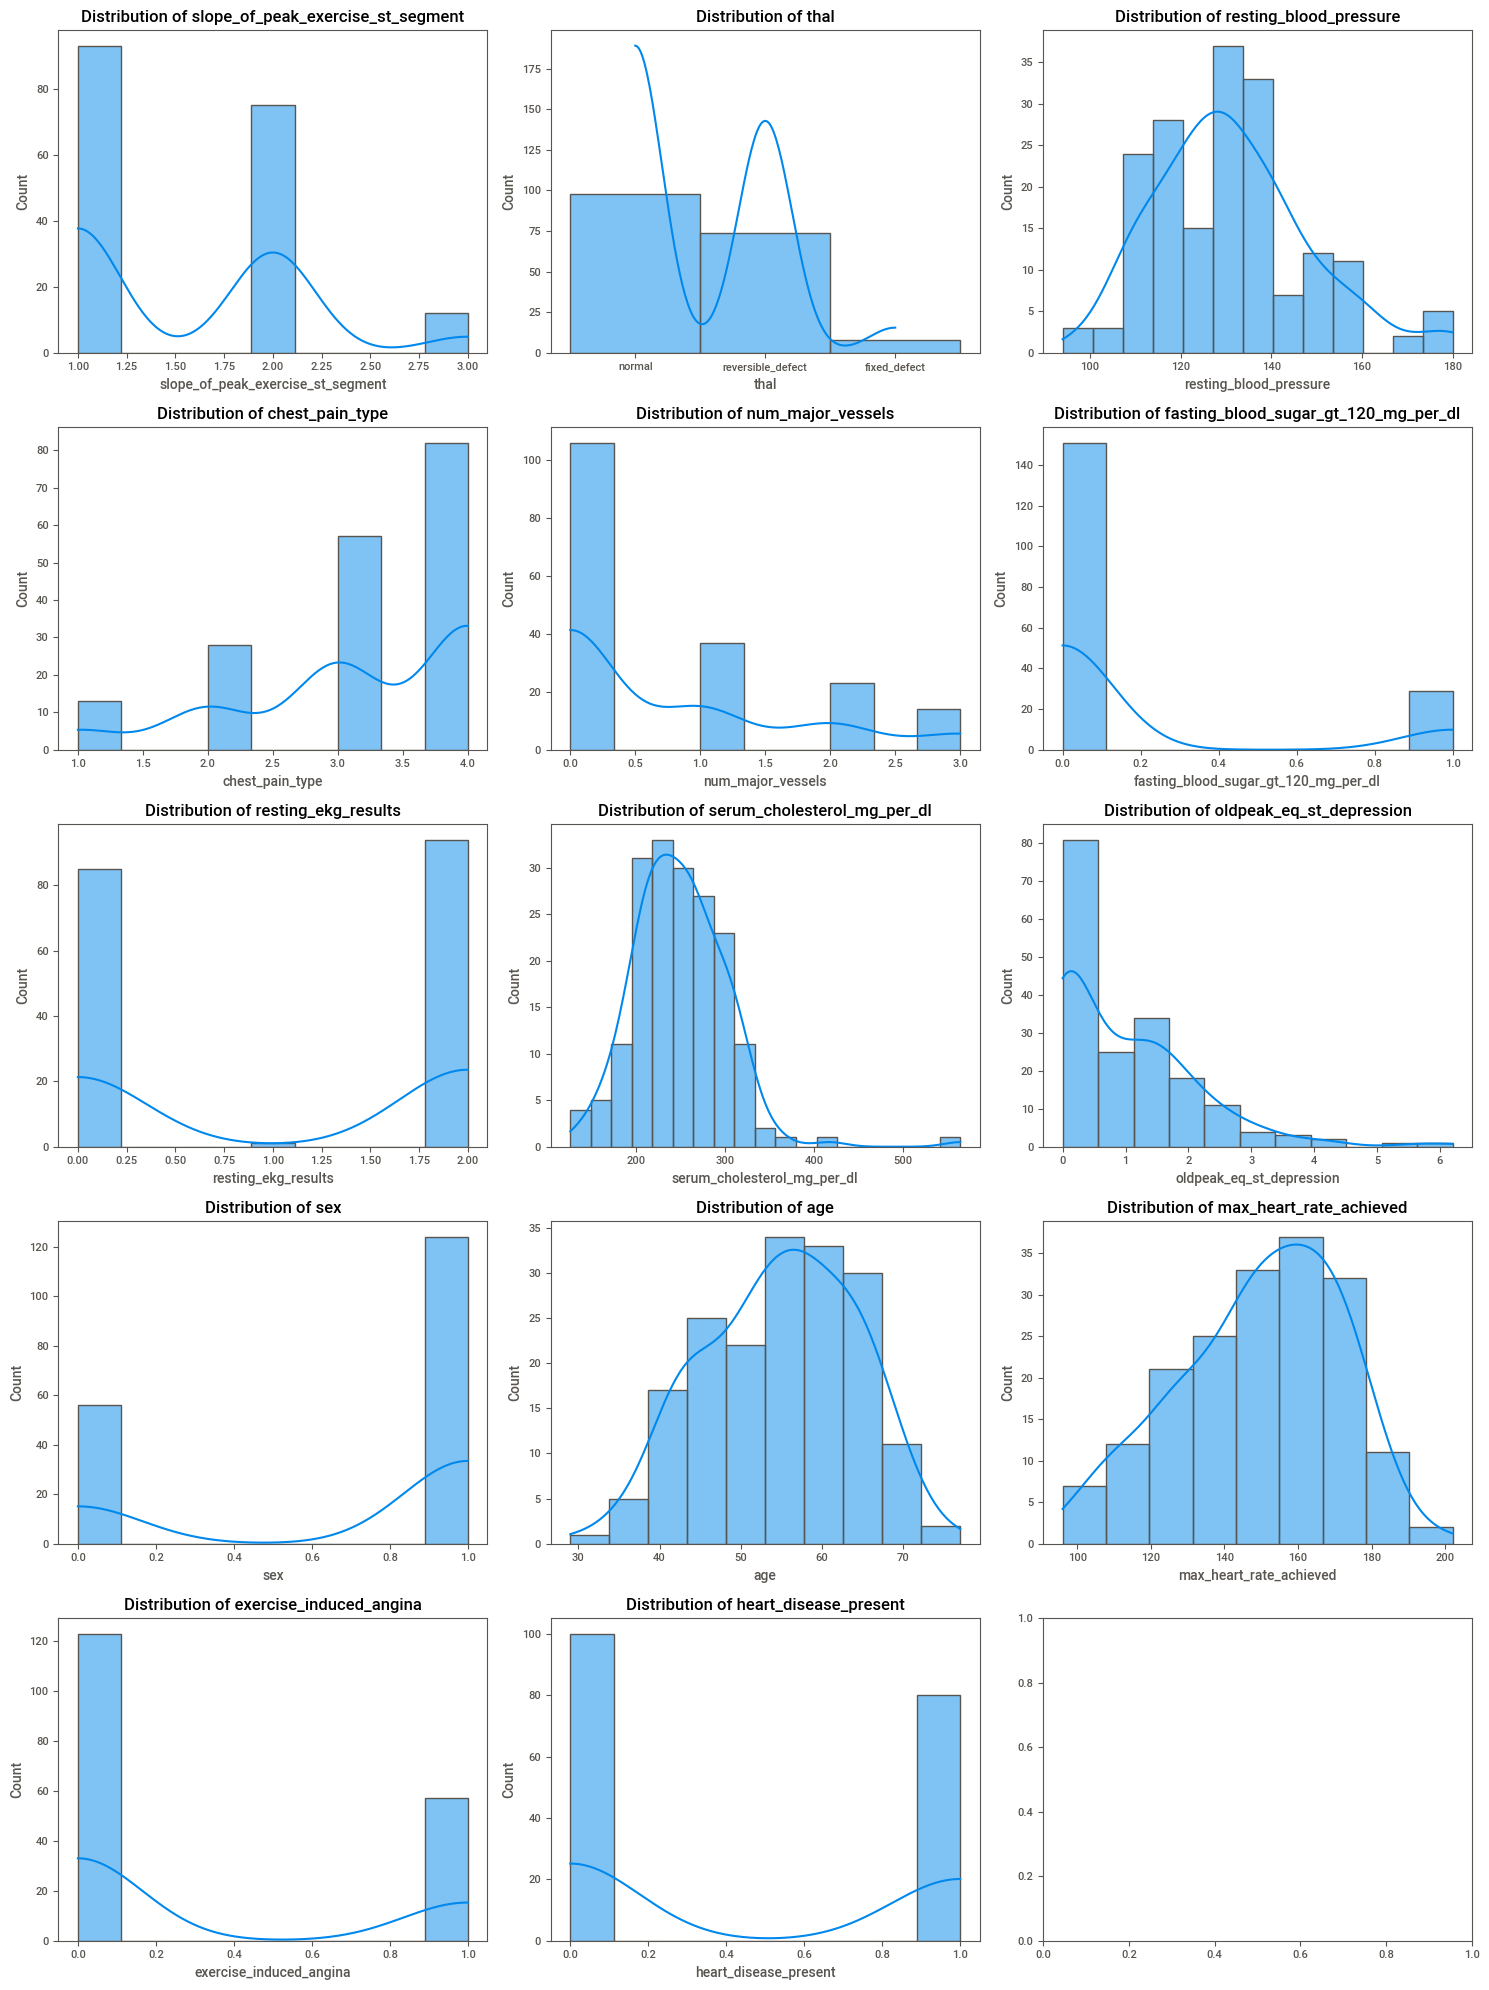

In [21]:
# Distribution plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()
columns = merged_df.columns[1:]  # Excluding patient_id

for i, col in enumerate(columns):
    sns.histplot(merged_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


### Bivariate Analysis

In [22]:
# Drop patient_id column
data = merged_df.drop(columns=['patient_id'])

In [23]:
pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 712.4 kB/s eta 0:00:00a 0:00:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 441.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 866.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 993.9 kB/s eta 0:00:00:010m:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 805.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 1.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 965.9 kB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 870.2 kB/s eta 0:00:0000:0100:01
  Attempting uninstall

In [24]:
cat_col=merged_df.select_dtypes(include=['object'])
cat_col

,patient_id,thal
0,0z64un,normal
1,ryoo3j,normal
2,yt1s1x,normal
3,l2xjde,reversible_defect
4,oyt4ek,reversible_defect
...,...,...
175,5qfar3,reversible_defect
176,2s2b1f,normal
177,nsd00i,reversible_defect
178,0xw93k,normal


In [39]:
# Encode categorical variables
data['thal'] = LabelEncoder().fit_transform(data['thal'])

In [26]:
data['thal'].value_counts()

1    98
2    74
0     8
Name: thal, dtype: int64

##### Multivariate Analysis

In [27]:
merged_df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


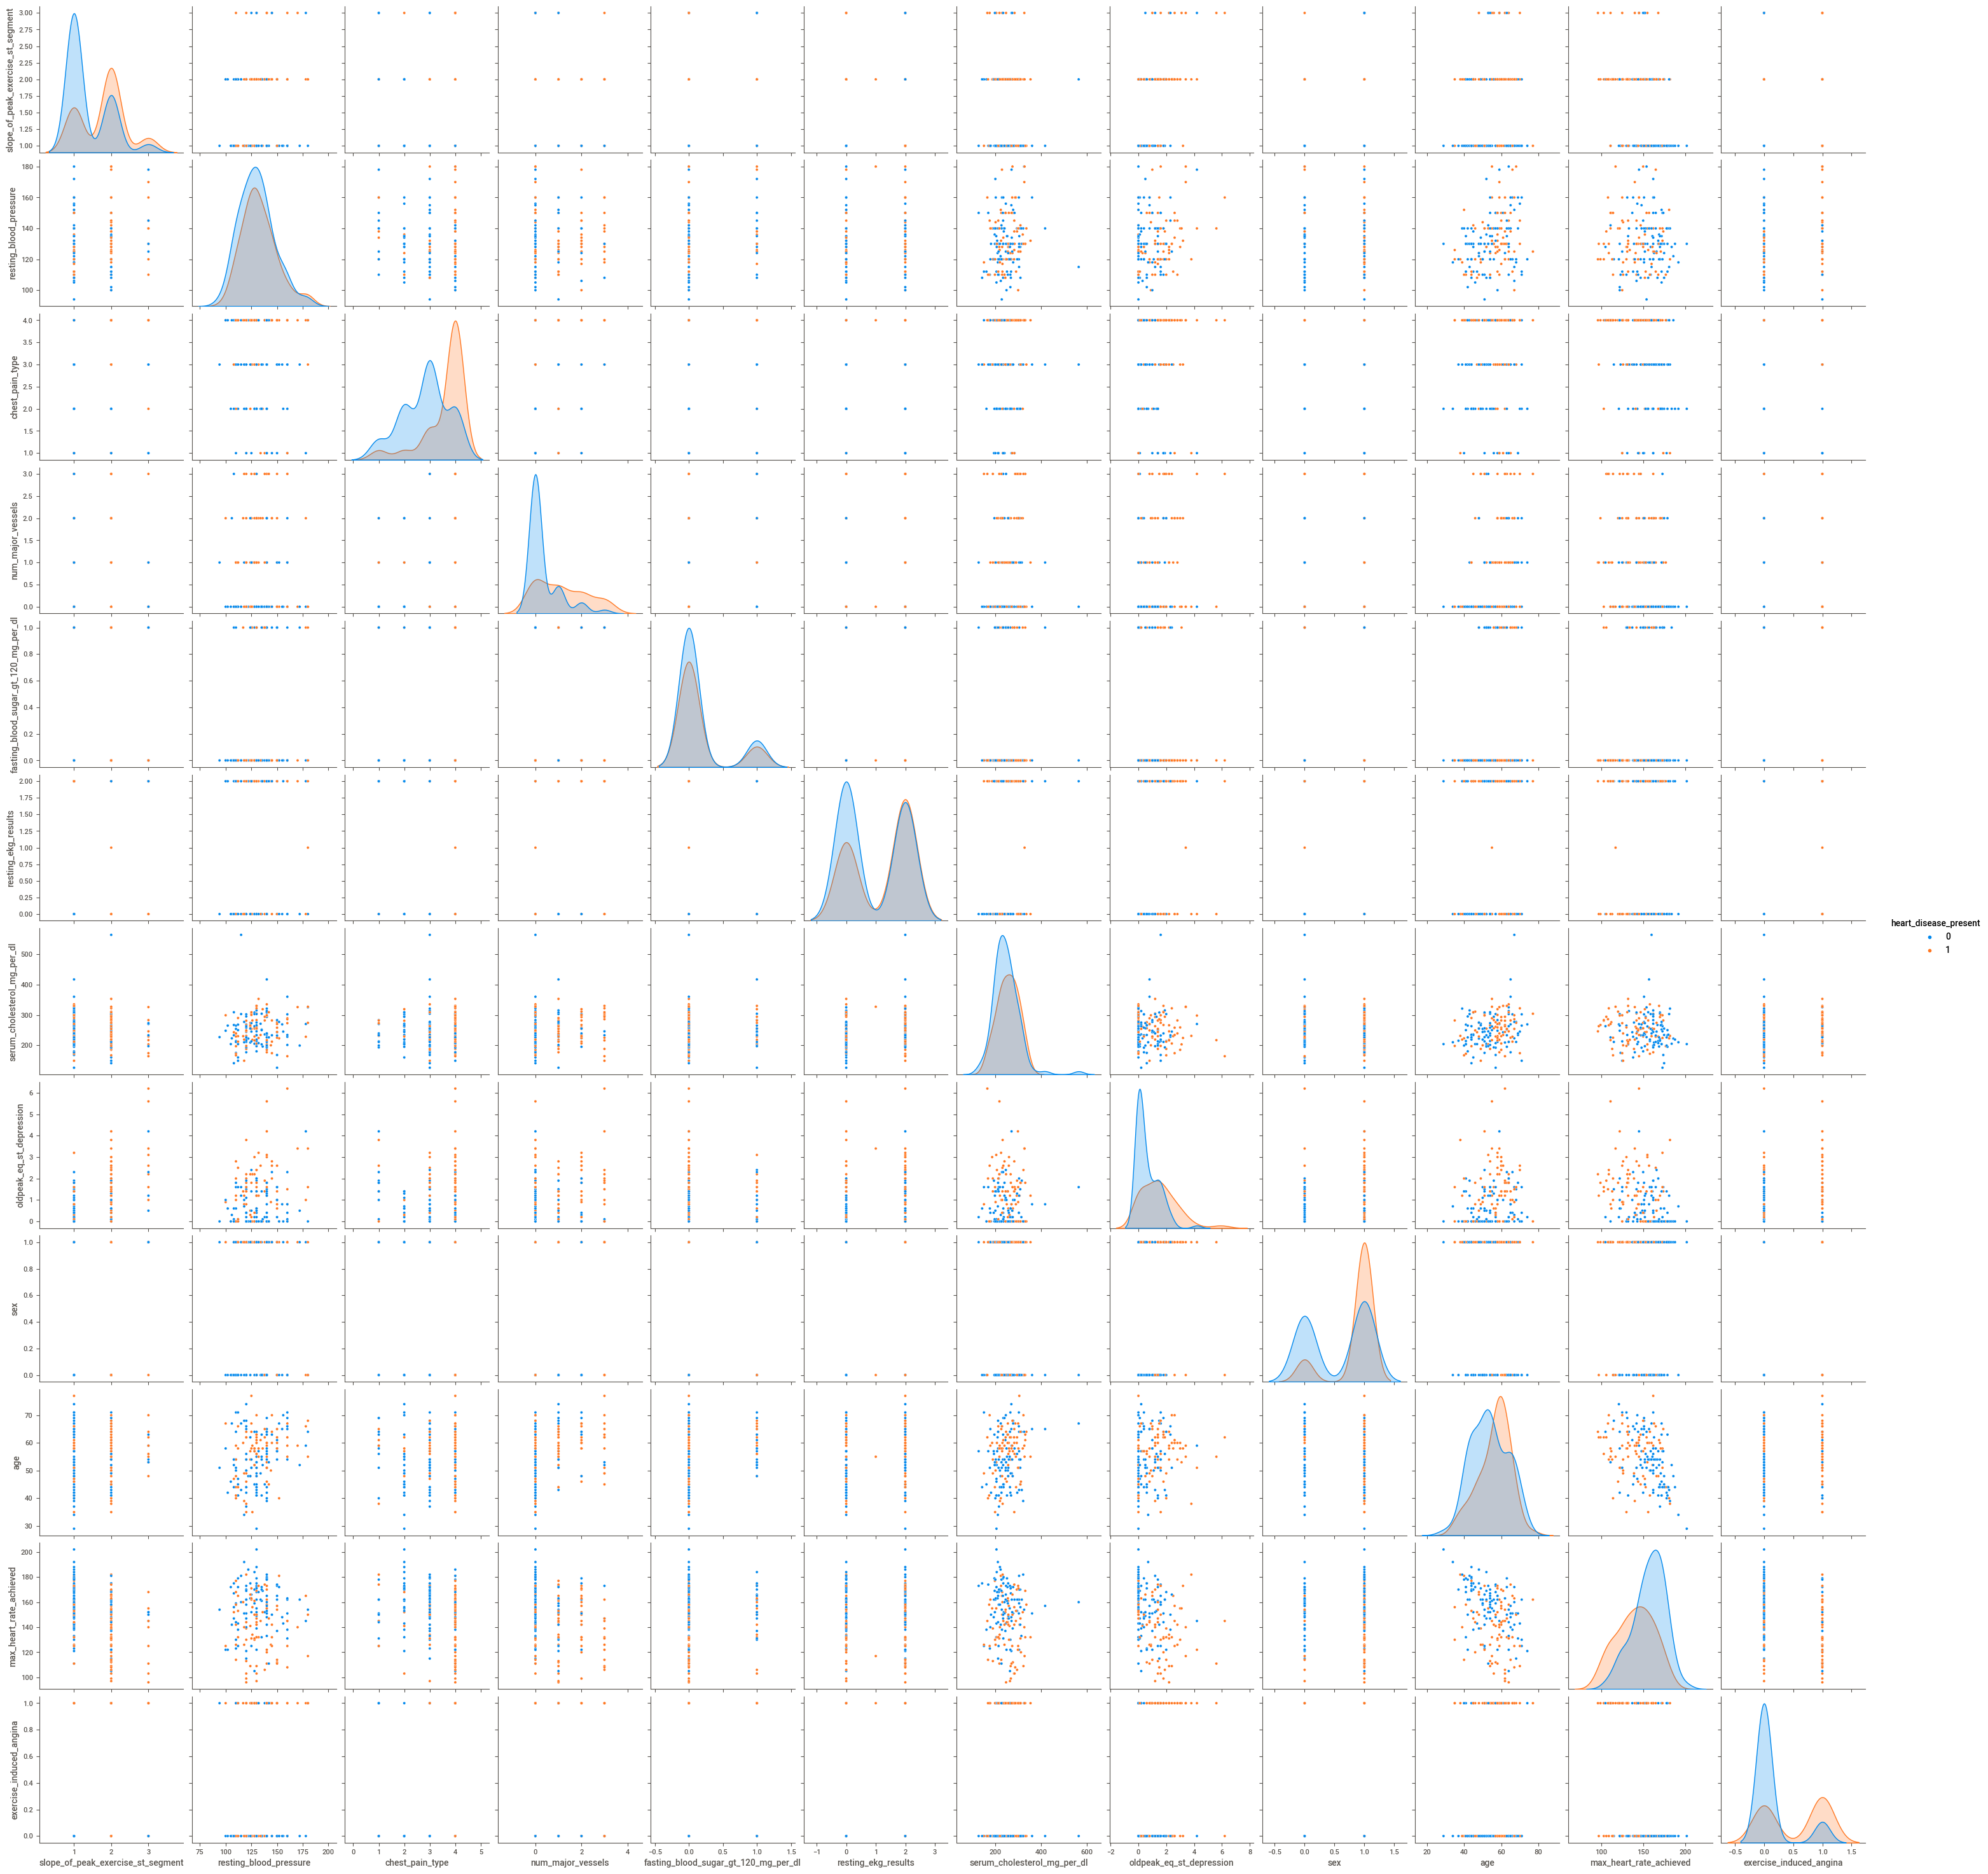

In [43]:
sns.pairplot(data=merged_df,hue='heart_disease_present')
plt.show()

outlier identification

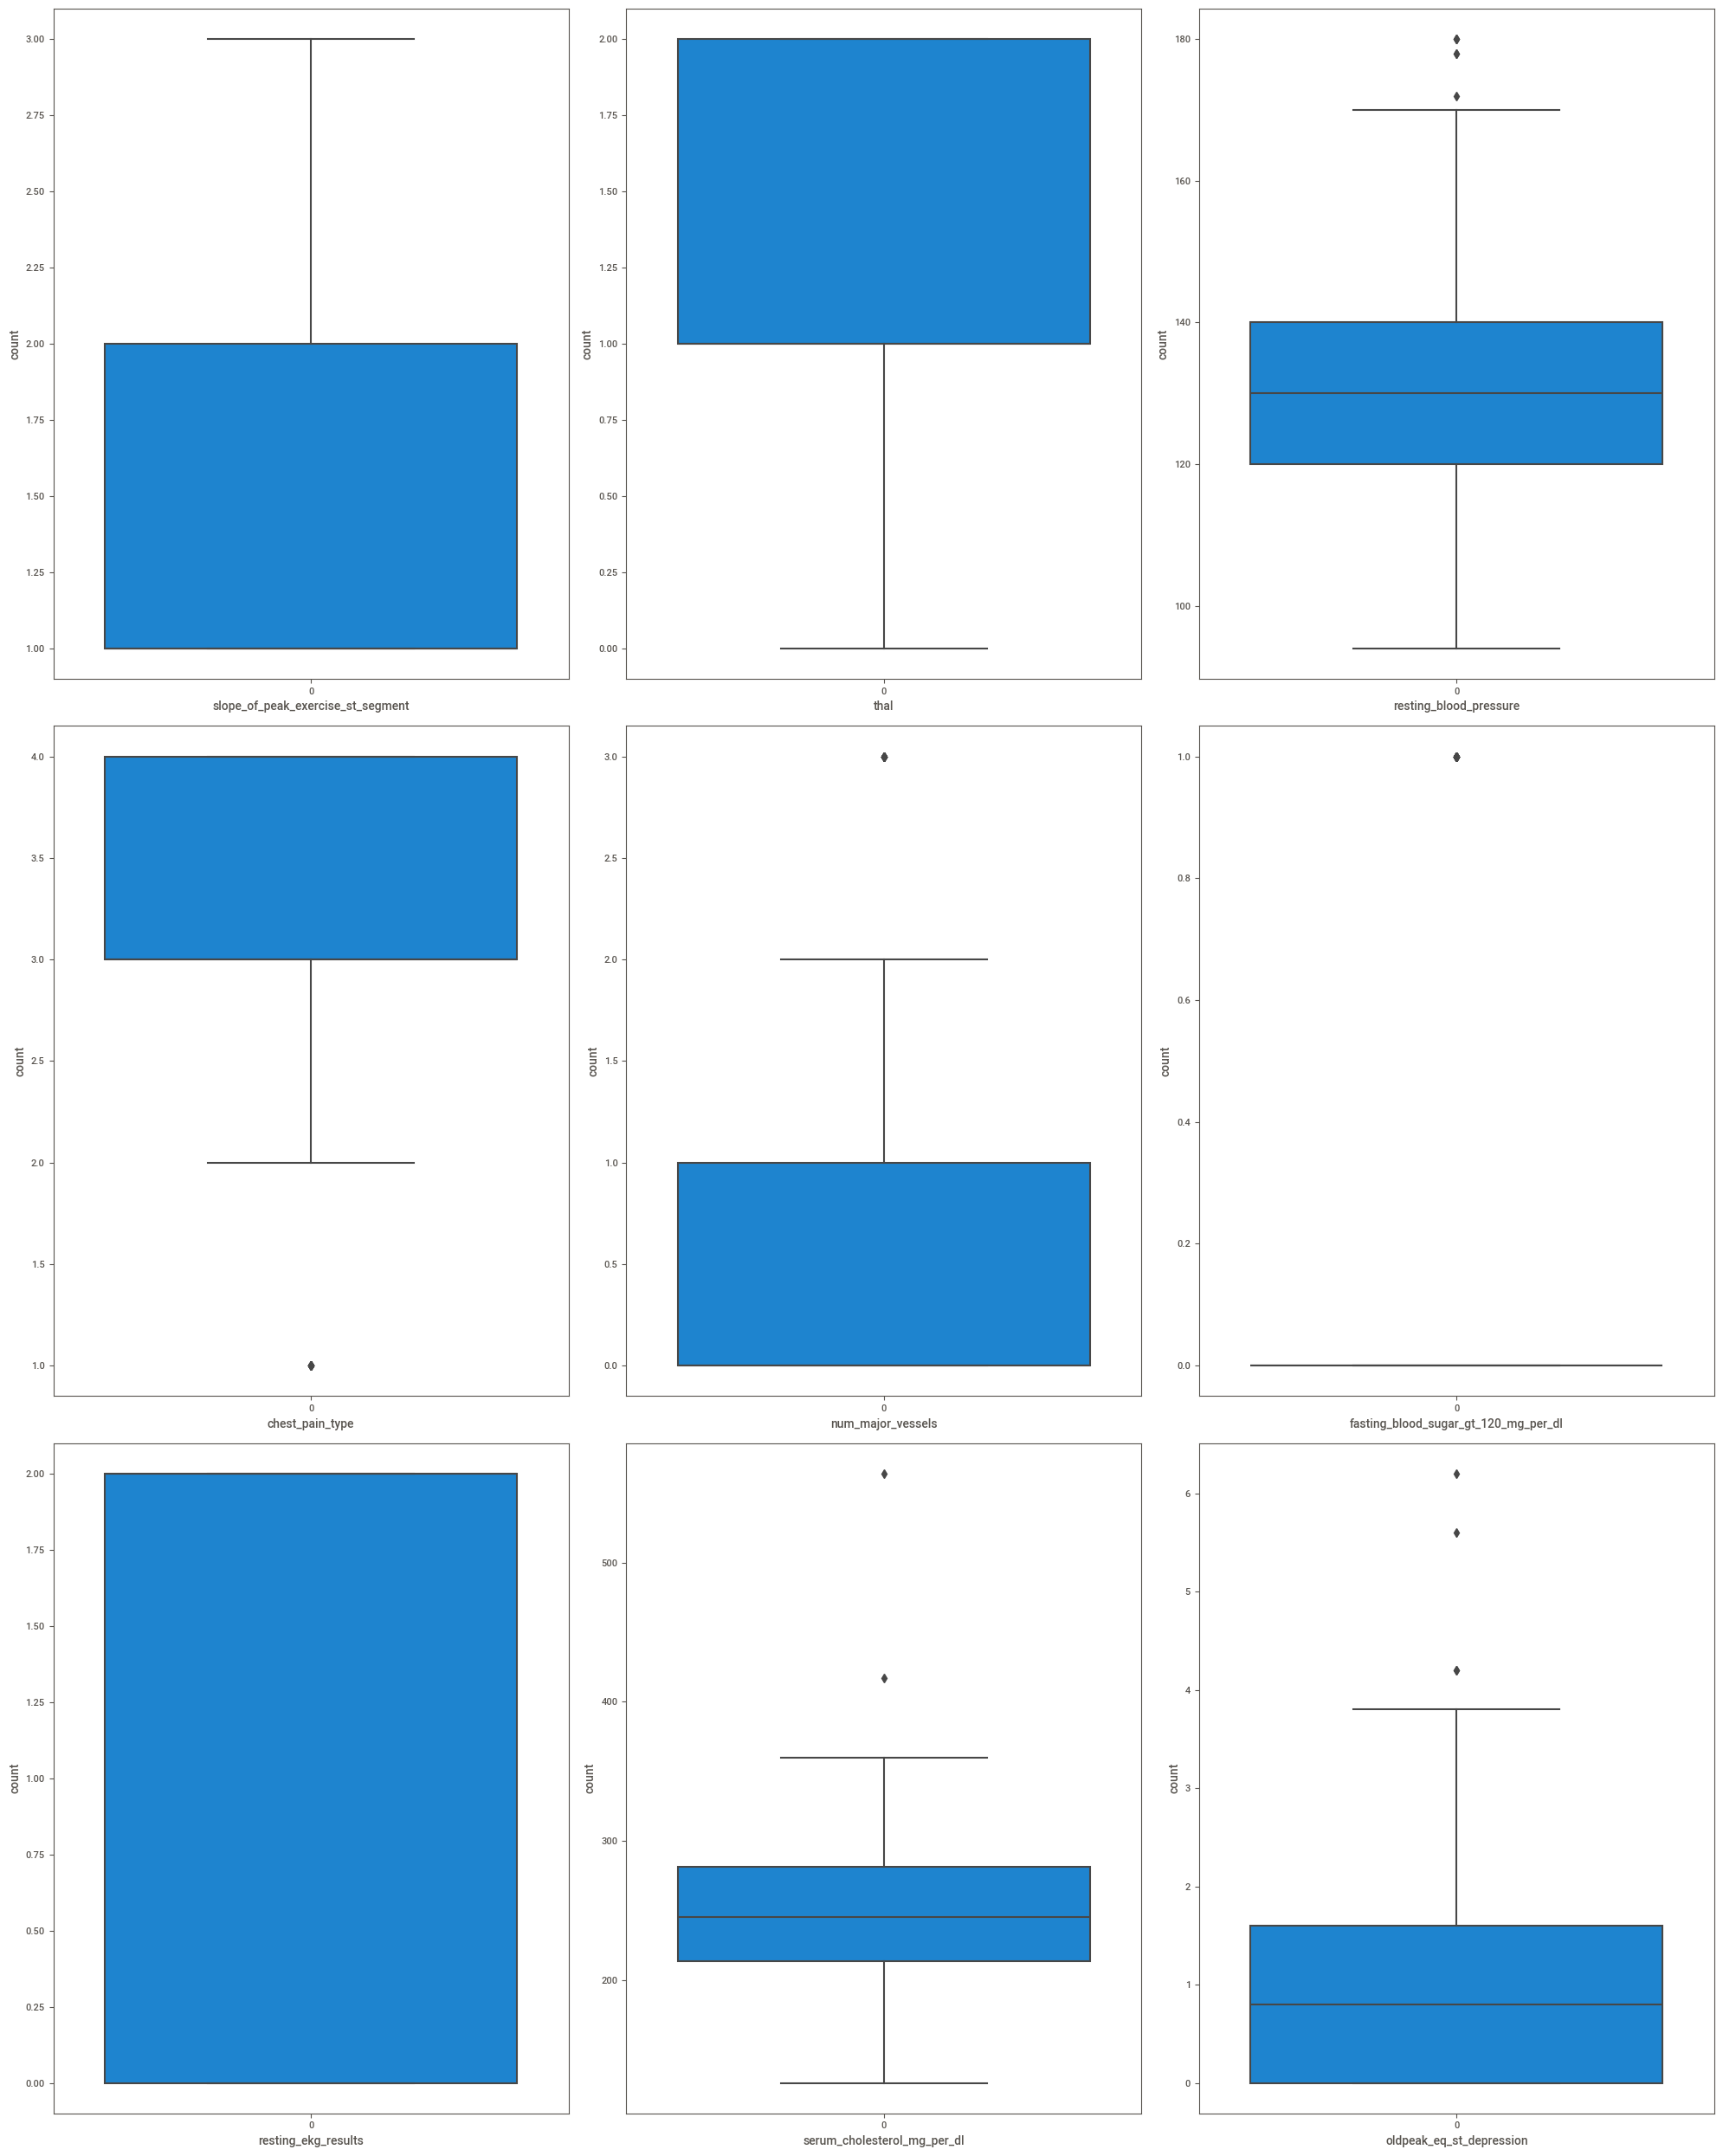

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for columns in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[columns])
        plt.xlabel(columns,fontsize=10)
        plt.ylabel('count',fontsize=10)
        plotnumber+=1
plt.tight_layout()

### Preprocessing

In [30]:
data.isnull().sum()
# no missing values in the data set to handle

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [44]:
data.duplicated()
# no duplicates to remove

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

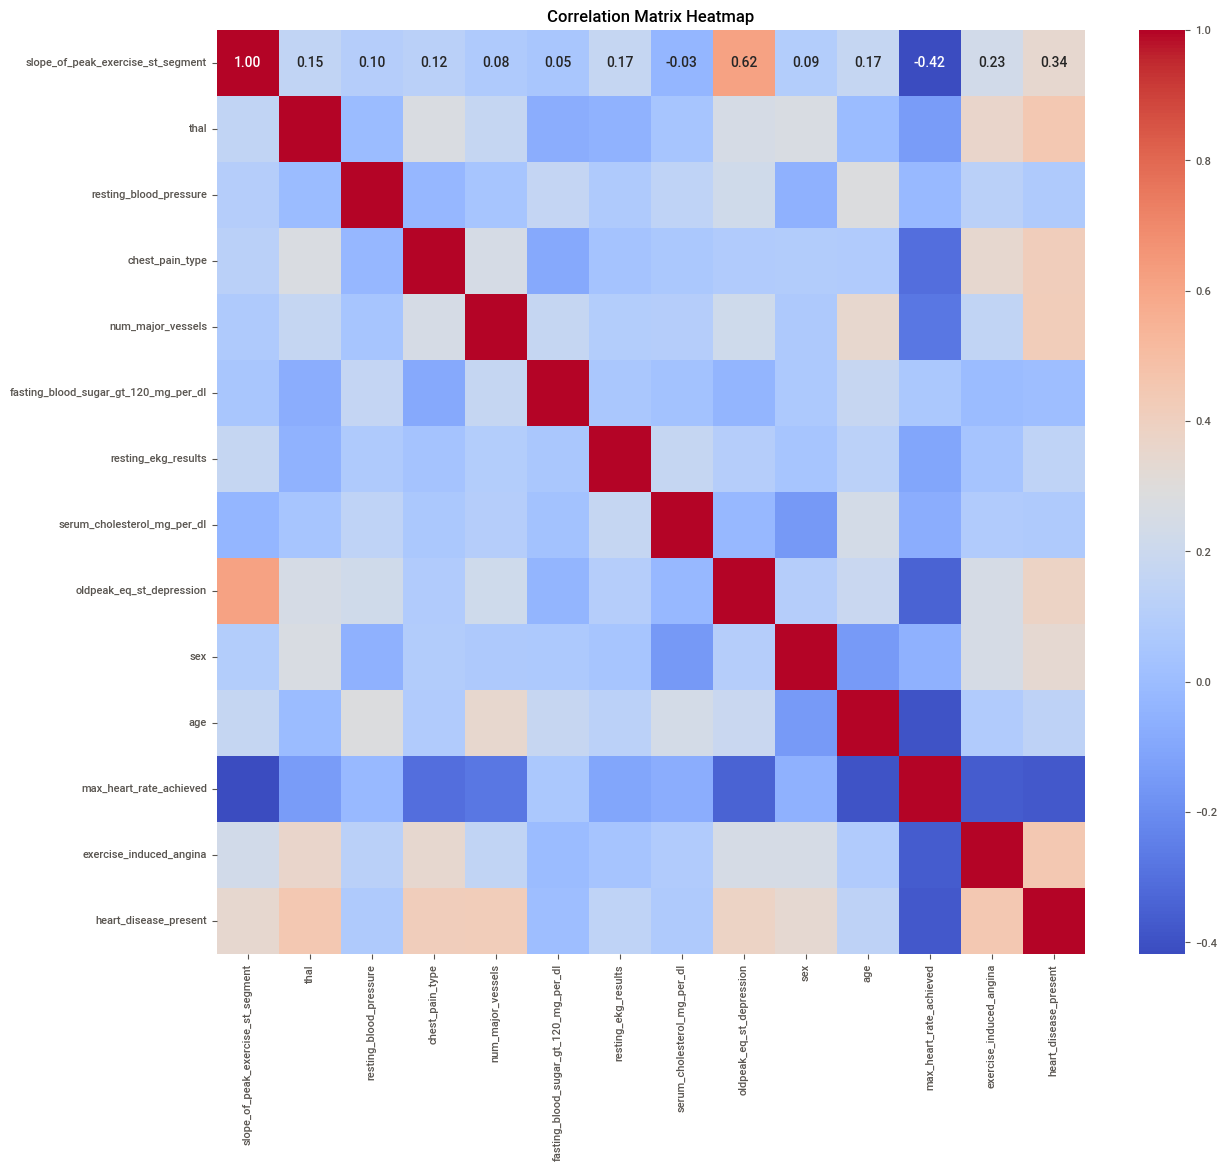

In [45]:
# Correlation matrix
correlation_matrix = data.corr()

# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


### Model Training

In [46]:
# Split data into features and target variable

X = data.drop(columns=['heart_disease_present'])
y = data['heart_disease_present']


In [34]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Scale the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Evaluation

In [36]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [37]:
# Train and evaluate the models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [38]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision  Recall  F1 Score
Logistic Regression     0.833333   0.937500    0.75  0.833333
Decision Tree           0.777778   0.928571    0.65  0.764706
Random Forest           0.833333   0.937500    0.75  0.833333
Support Vector Machine  0.861111   1.000000    0.75  0.857143


Task 3: Suggestions to the Hospital
Enhancing Heart Disease Predictions and Prevention
Implement Predictive Analytics in Routine Check-ups:

Integration of Predictive Models: Integrate predictive models into the hospital’s EHR system to identify high-risk patients.
Regular Screening: Encourage regular cardiovascular screenings for patients with risk factors.
Personalized Preventive Care Plans:

Risk Assessment Reports: Provide individualized risk assessment reports to patients.
Lifestyle Modification Programs: Develop tailored lifestyle modification programs.
Medication Management: Ensure appropriate medication management for high-risk patients.
Patient Education and Engagement:

Awareness Campaigns: Conduct campaigns to raise awareness about heart disease.
Educational Materials: Provide materials, workshops, and seminars on heart health.
Digital Health Tools: Use mobile apps and online portals for patient engagement.
Enhance Data Collection and Monitoring:

Comprehensive Health Records: Ensure accurate and comprehensive health record collection.
Wearable Devices: Encourage the use of wearables for real-time health monitoring.
Remote Monitoring: Implement remote monitoring programs for high-risk patients.
Interdisciplinary Collaboration:

Team-Based Care: Promote collaboration among cardiologists, primary care physicians, and other specialists.
Regular Case Reviews: Conduct regular reviews and discussions on patient care plans.
Continuous Improvement and Research:

Model Updates: Regularly update predictive models with new data.
Clinical Research: Engage in research to explore new treatments and preventive strategies.
Feedback Loop: Establish a feedback loop to assess and adjust care protocols.
Emergency Preparedness:

Emergency Protocols: Develop and update protocols for managing high-risk patients.
Training: Train staff on emergency response for heart disease patients.
Community Outreach:

Community Health Programs: Organize programs to reach underserved populations.
Partnerships: Partner with local organizations to extend heart health services.